In [1]:
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

In [2]:
#importing data as dataframe
f='final_data.xlsx'
#f='/content/Fetch-daily-product/final_data.xlsx'
df= pd.read_excel(f,index_col=0)

In [3]:
df

,date,jdate,M+L+E(ton/day),H(ton/day),A(ton/day),G(ton/day)
0,2019-03-21,1398/01/01,11131,860.78,12131.0,551.00
1,2019-03-22,1398/01/02,11514,789.73,12385.3,543.00
2,2019-03-23,1398/01/03,11849,854.57,12415.0,530.00
3,2019-03-24,1398/01/04,11722,862.67,12278.4,524.00
4,2019-03-25,1398/01/05,9127,585.07,9948.0,385.00
...,...,...,...,...,...,...
1079,2022-03-04,1400/12/13,13151,819.96,14243.0,164.00
1080,2022-03-05,1400/12/14,13069,755.44,13928.2,156.00
1081,2022-03-06,1400/12/15,13089,265.12,13950.7,162.00
1082,2022-03-07,1400/12/16,13148,480.42,13935.3,154.00


In [4]:
#see inside of dataframe
df.describe(include='all')

C:\Users\H03C7~1.ALA\AppData\Local\Temp/ipykernel_5816/403188952.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,date,jdate,M+L+E(ton/day),H(ton/day),A(ton/day),G(ton/day)
count,1084,1084,1084.000000,1084.000000,1084.000000,1084.000000
unique,1084,1084,NaN,NaN,NaN,NaN
top,2019-03-21 00:00:00,1398/01/01,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN
first,2019-03-21 00:00:00,NaN,NaN,NaN,NaN,NaN
last,2022-03-08 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,10116.183579,654.032518,10940.533072,414.232574
std,NaN,NaN,3809.979111,358.062252,4120.150555,269.909104
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,10543.000000,409.905000,11445.425000,166.000000


In [5]:
#only production over 10000 ton/day analysed
df=df[df['M+L+E(ton/day)'] > 10000]

#H and G must be > 0
df=df[df['H(ton/day)'] > 0]
df=df[df['G(ton/day)'] > 0]

Text(0, 0.5, 'Total Production per day (ton)')

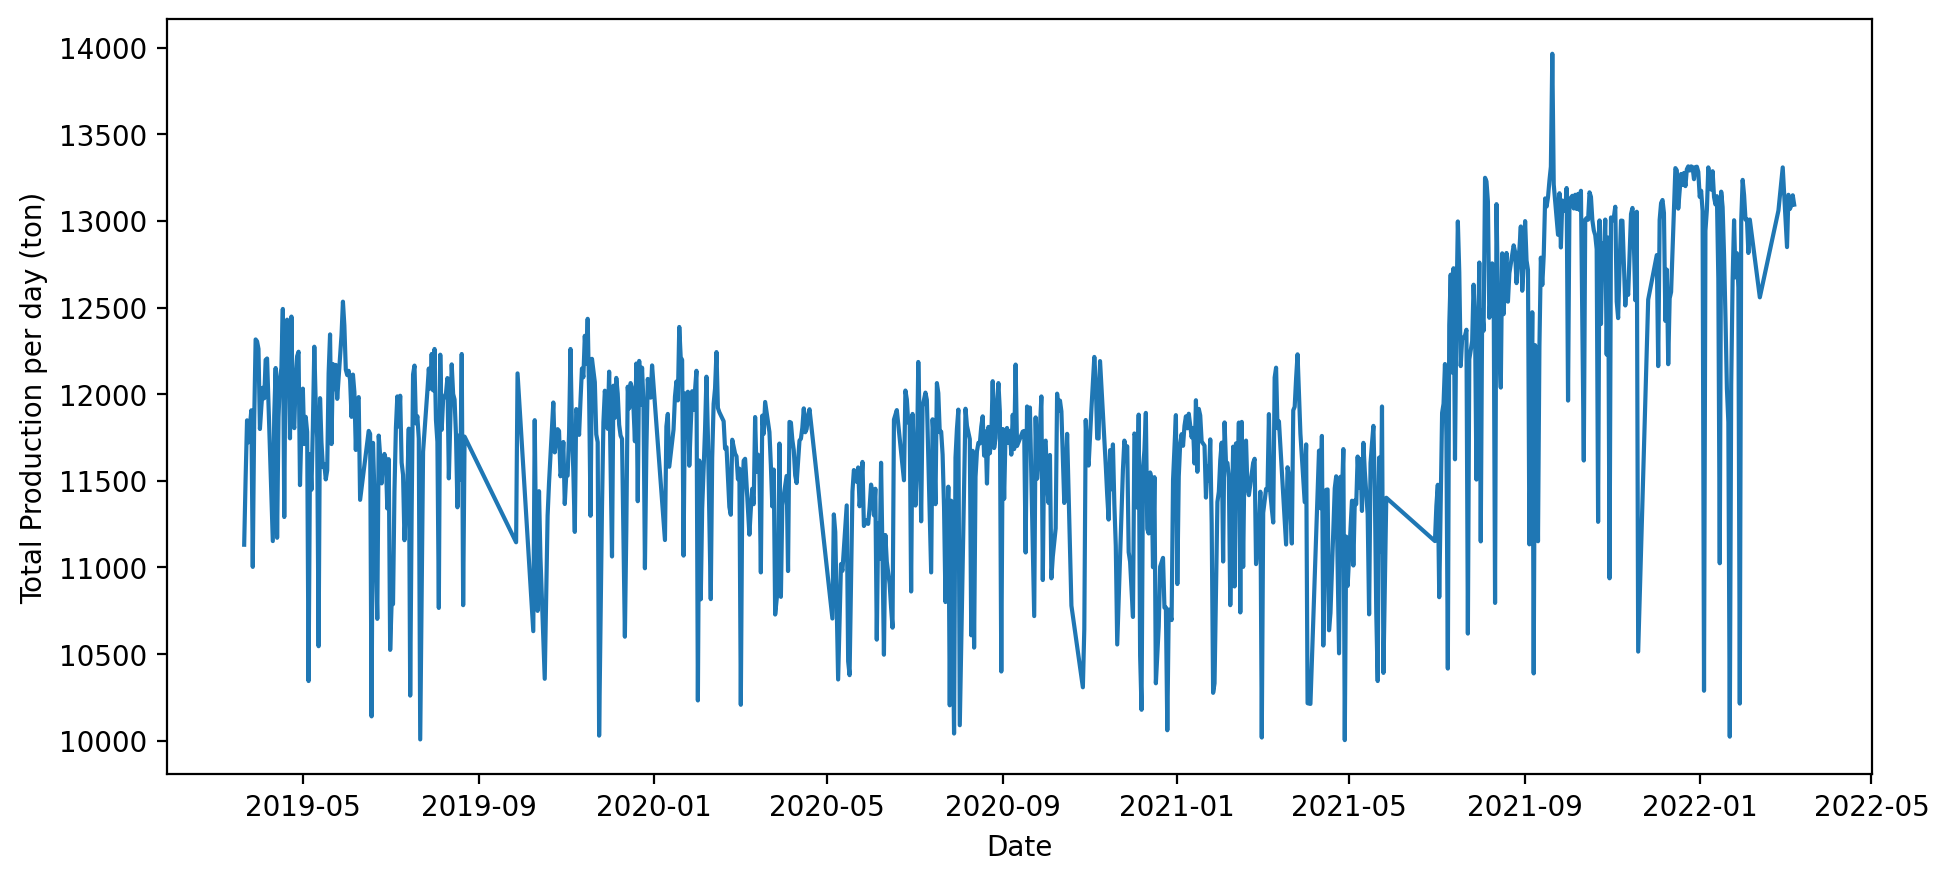

In [6]:
fix , ax = plt.subplots(figsize=(11,5),dpi=200)
ax.plot(df['date'],df['M+L+E(ton/day)'],)
ax.set_xlabel('Date')
ax.set_ylabel('Total Production per day (ton)')

In [7]:
#cleaning data by IsolationForest
from sklearn.ensemble import IsolationForest
data=df.iloc[:,2:].values
iso = IsolationForest()
yhat = iso.fit_predict(data)

In [8]:
# select all rows that are not outliers
mask = yhat != -1
df=df[mask]

In [9]:
df.reset_index(drop=True , inplace=True)

Text(0, 0.5, 'Total Production per day (ton)')

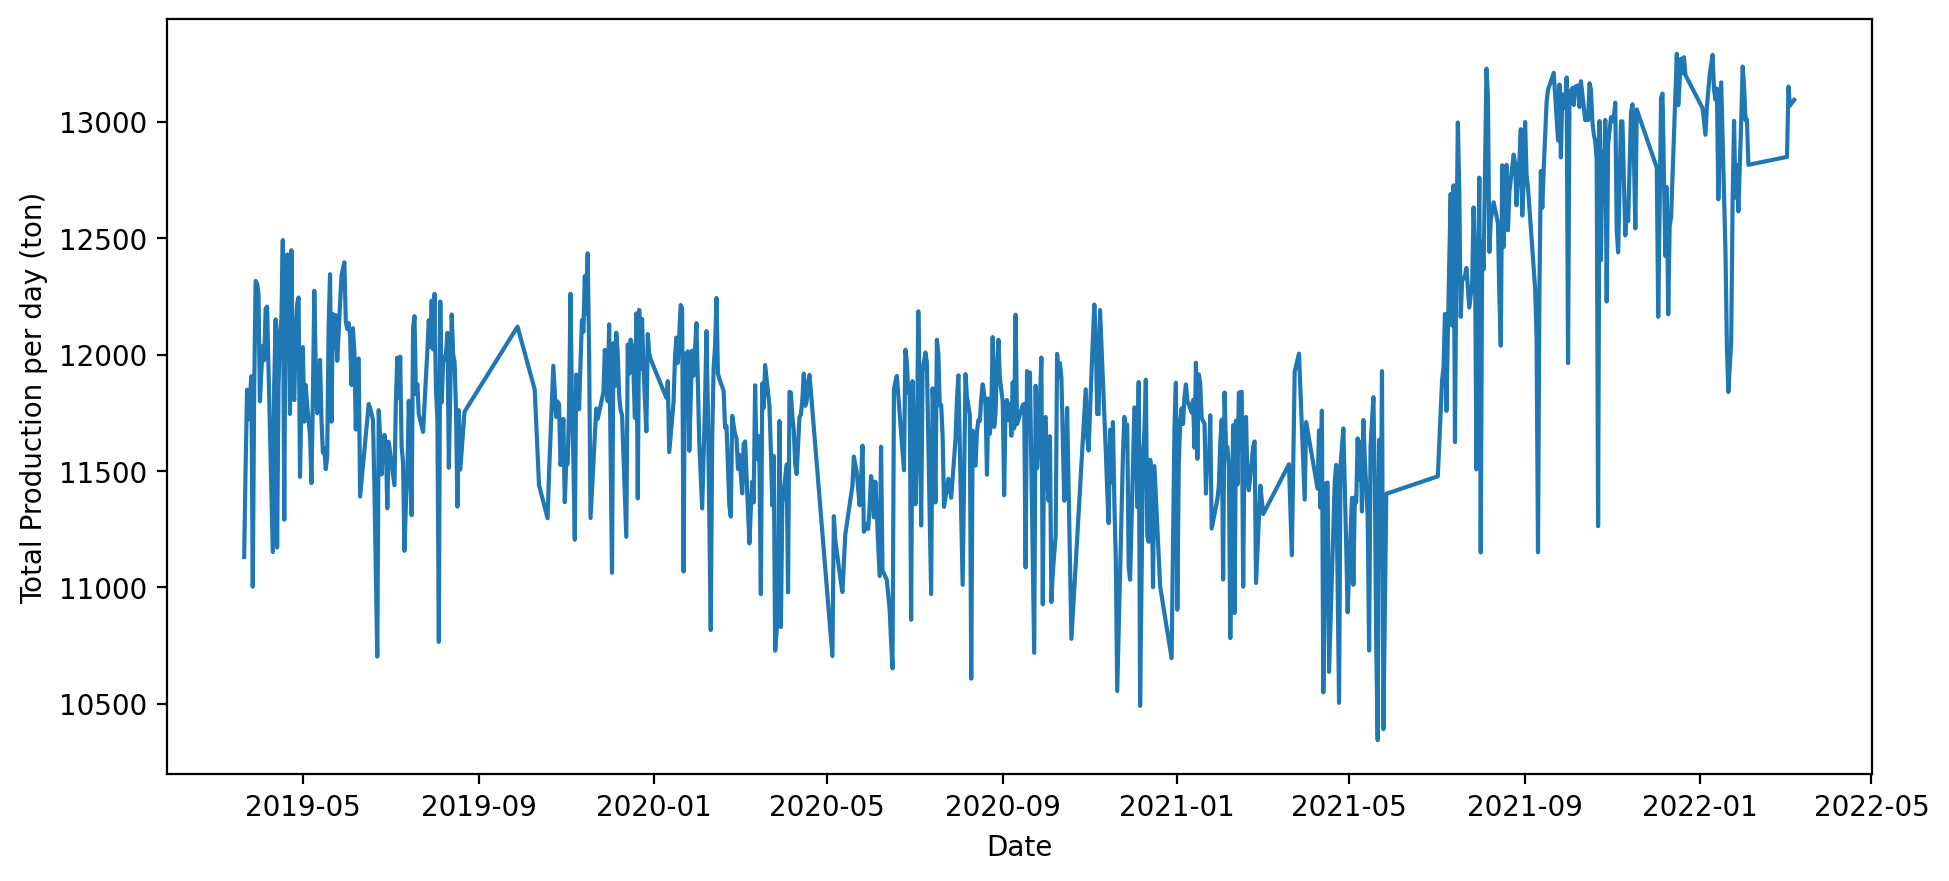

In [10]:
fix , ax = plt.subplots(figsize=(11,5),dpi=200)
ax.plot(df['date'],df['M+L+E(ton/day)'],)
ax.set_xlabel('Date')
ax.set_ylabel('Total Production per day (ton)')

In [12]:
df.describe()

,M+L+E(ton/day),H(ton/day),A(ton/day),G(ton/day)
count,688.000000,688.000000,688.000000,688.000000
mean,11898.931686,792.780262,12853.481308,502.418692
std,595.603206,238.735239,515.624618,220.370469
min,10344.000000,96.220000,11315.500000,5.000000
25%,11528.750000,640.855000,12540.540000,331.010000
50%,11805.000000,844.735000,12869.910000,525.500000
75%,12172.250000,964.155000,13165.420000,684.242500
max,13292.000000,1285.540000,14282.300000,897.970000


In [13]:
#save cleand data
#df.to_excel('cleand_data.xlsx')

In [13]:
#calculating landa and H/A and G/A
final_df=df.copy()
landa=(df['A(ton/day)']-df['G(ton/day)']-df['H(ton/day)'])/df['M+L+E(ton/day)']
HA=df['H(ton/day)']/df['A(ton/day)']
GA=df['G(ton/day)']/df['A(ton/day)']
final_df['landa']= landa
final_df['H/A']=HA
final_df['G/A']=GA

In [14]:
final_df

,date,jdate,M+L+E(ton/day),H(ton/day),A(ton/day),G(ton/day),landa,H/A,G/A
0,2019-03-21,1398/01/01,11131,860.78,12131.0,551.00,0.963006,0.070957,0.045421
1,2019-03-22,1398/01/02,11514,789.73,12385.3,543.00,0.959924,0.063763,0.043842
2,2019-03-23,1398/01/03,11849,854.57,12415.0,530.00,0.930917,0.068834,0.042690
3,2019-03-24,1398/01/04,11722,862.67,12278.4,524.00,0.929170,0.070259,0.042677
4,2019-03-26,1398/01/06,11907,840.19,12961.5,481.00,0.977602,0.064822,0.037110
...,...,...,...,...,...,...,...,...,...
689,2022-02-04,1400/11/15,12815,804.29,13742.0,186.00,0.995061,0.058528,0.013535
690,2022-03-03,1400/12/12,12849,1021.63,13931.5,142.94,0.993613,0.073332,0.010260
691,2022-03-04,1400/12/13,13151,819.96,14243.0,164.00,1.008215,0.057569,0.011514
692,2022-03-05,1400/12/14,13069,755.44,13928.2,156.00,0.996003,0.054238,0.011200


In [15]:
kde = gaussian_kde(final_df.landa, bw_method=None, weights=None)

a={}
for item in np.linspace(0.8,1.2,100000):
    a[item]=kde.evaluate(item)
max_value = max(a, key=a.get)
max_value

0.9583175831758317

C:\Users\heidar\AppData\Local\Temp/ipykernel_8820/935330836.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, rotation=45, ha='right')


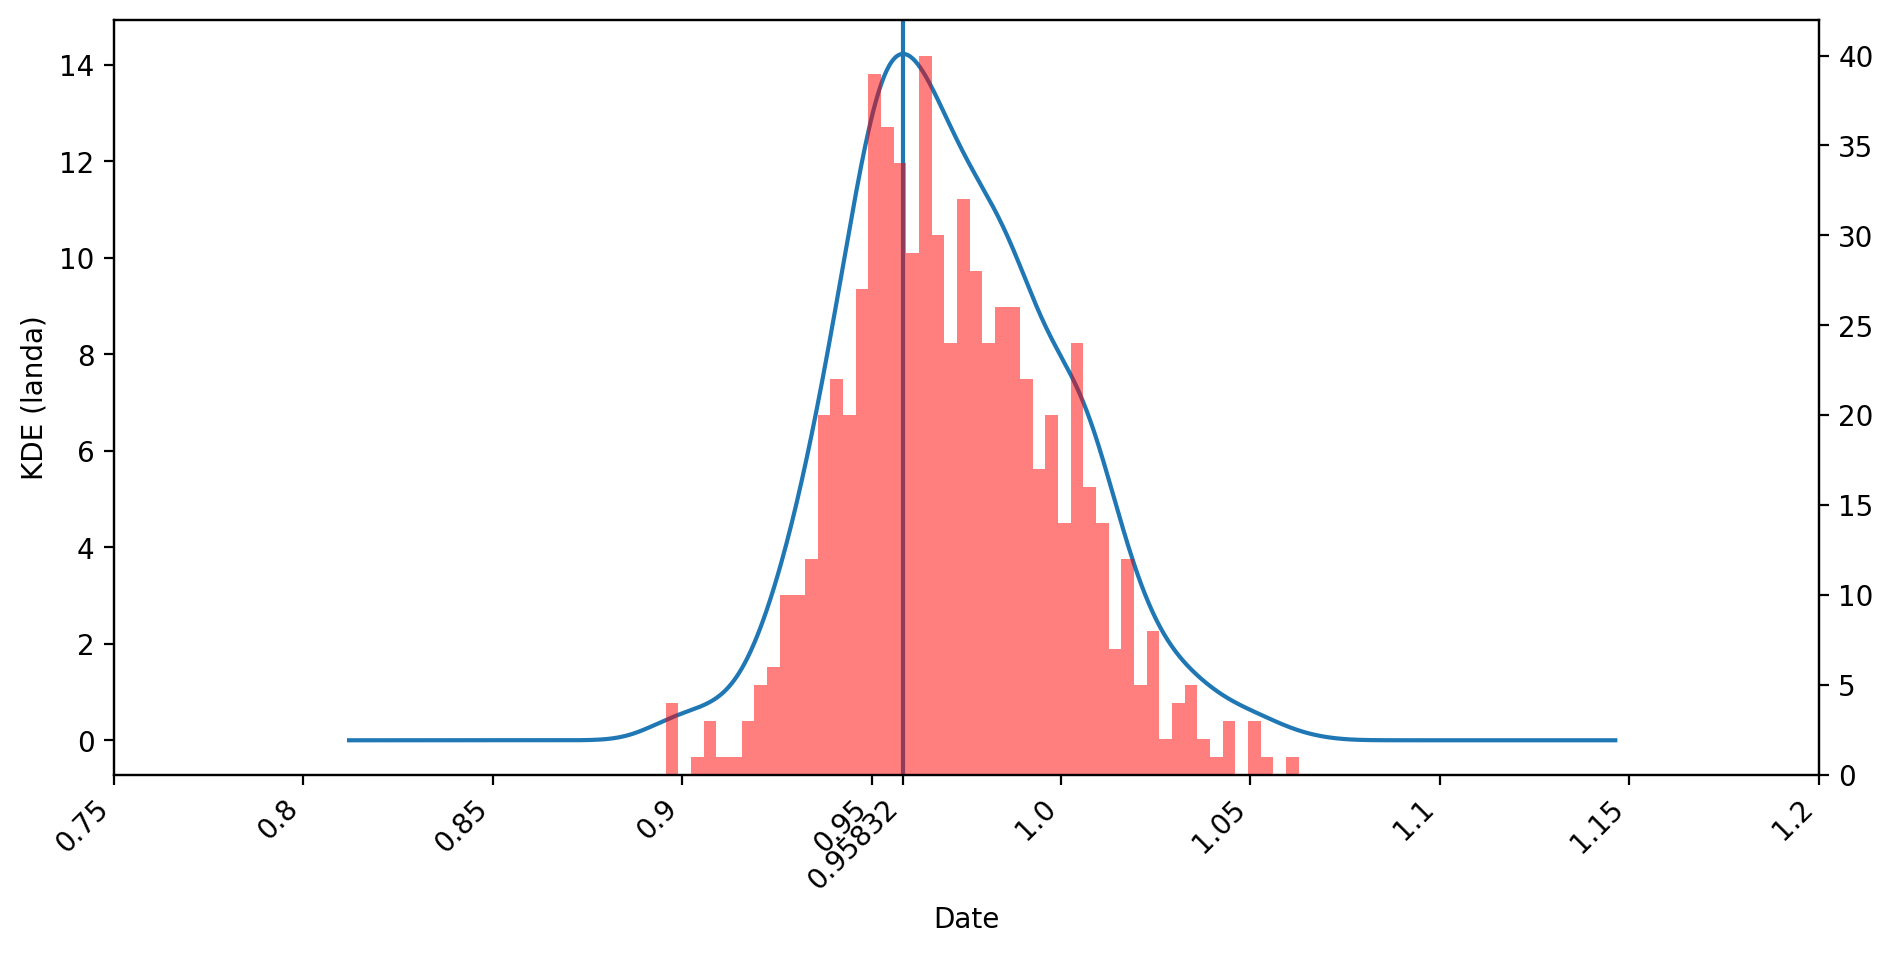

In [16]:
fig , ax = plt.subplots(figsize=(11,5),dpi=200)
final_df.landa.plot(kind='kde', ax=ax)
final_df.landa.plot(kind='hist', ax=ax, secondary_y=True,alpha=0.5,bins=50,color='red')
ax.set_xlabel('Date')
ax.set_ylabel('KDE (landa)')
xlabels=ax.get_xticks().round(decimals=4)
xlabels = np.append(xlabels,np.array(max_value).round(decimals=5))
ax.set_xticklabels(xlabels, rotation=45, ha='right')
ax.set_xticks(xlabels)
ax.axvline(max_value)
plt.show()

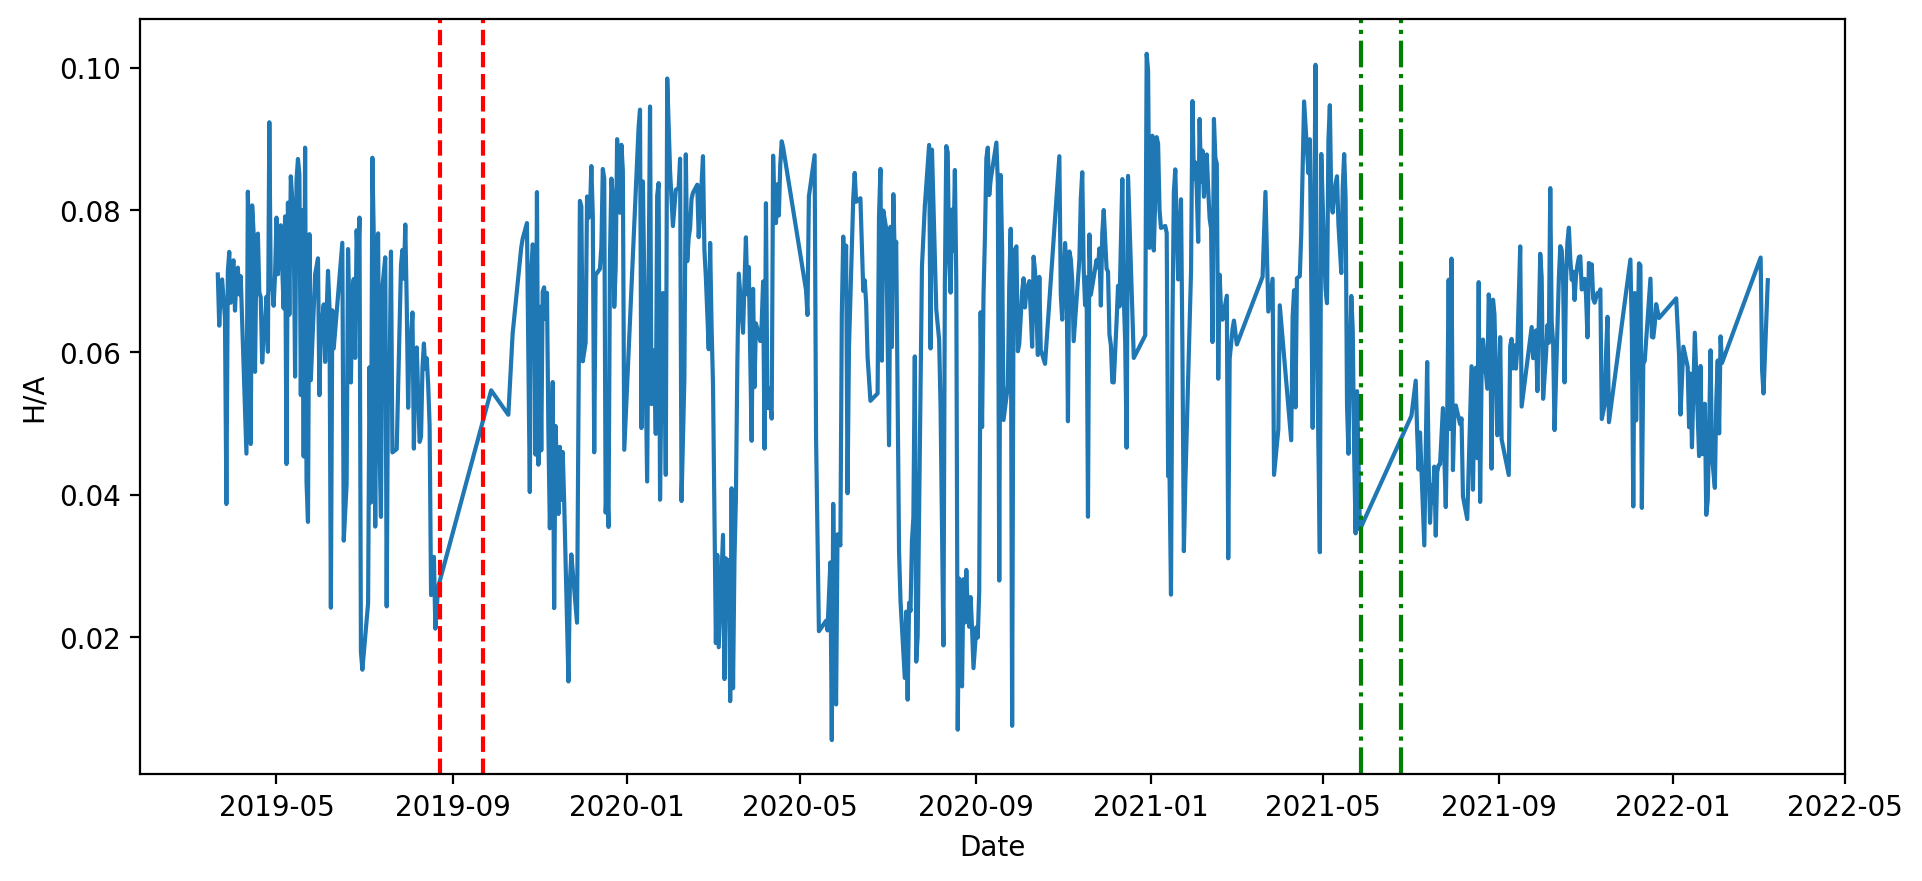

In [17]:
import datetime as dt
fix , ax = plt.subplots(figsize=(11,5),dpi=200)
ax.plot(final_df['date'],final_df['H/A'],)
#ax.plot(h_per_a_df['date'],h_per_a_df['landa'],)
ax.set_xlabel('Date')
ax.set_ylabel('H/A')
ax.axvline(dt.datetime(2019,8, 23),c='red',ls='--')
ax.axvline(dt.datetime(2019,9, 22),c='red',ls='--')
ax.axvline(dt.datetime(2021,6, 25),c='green',ls='-.')
ax.axvline(dt.datetime(2021,5, 28),c='green',ls='-.')

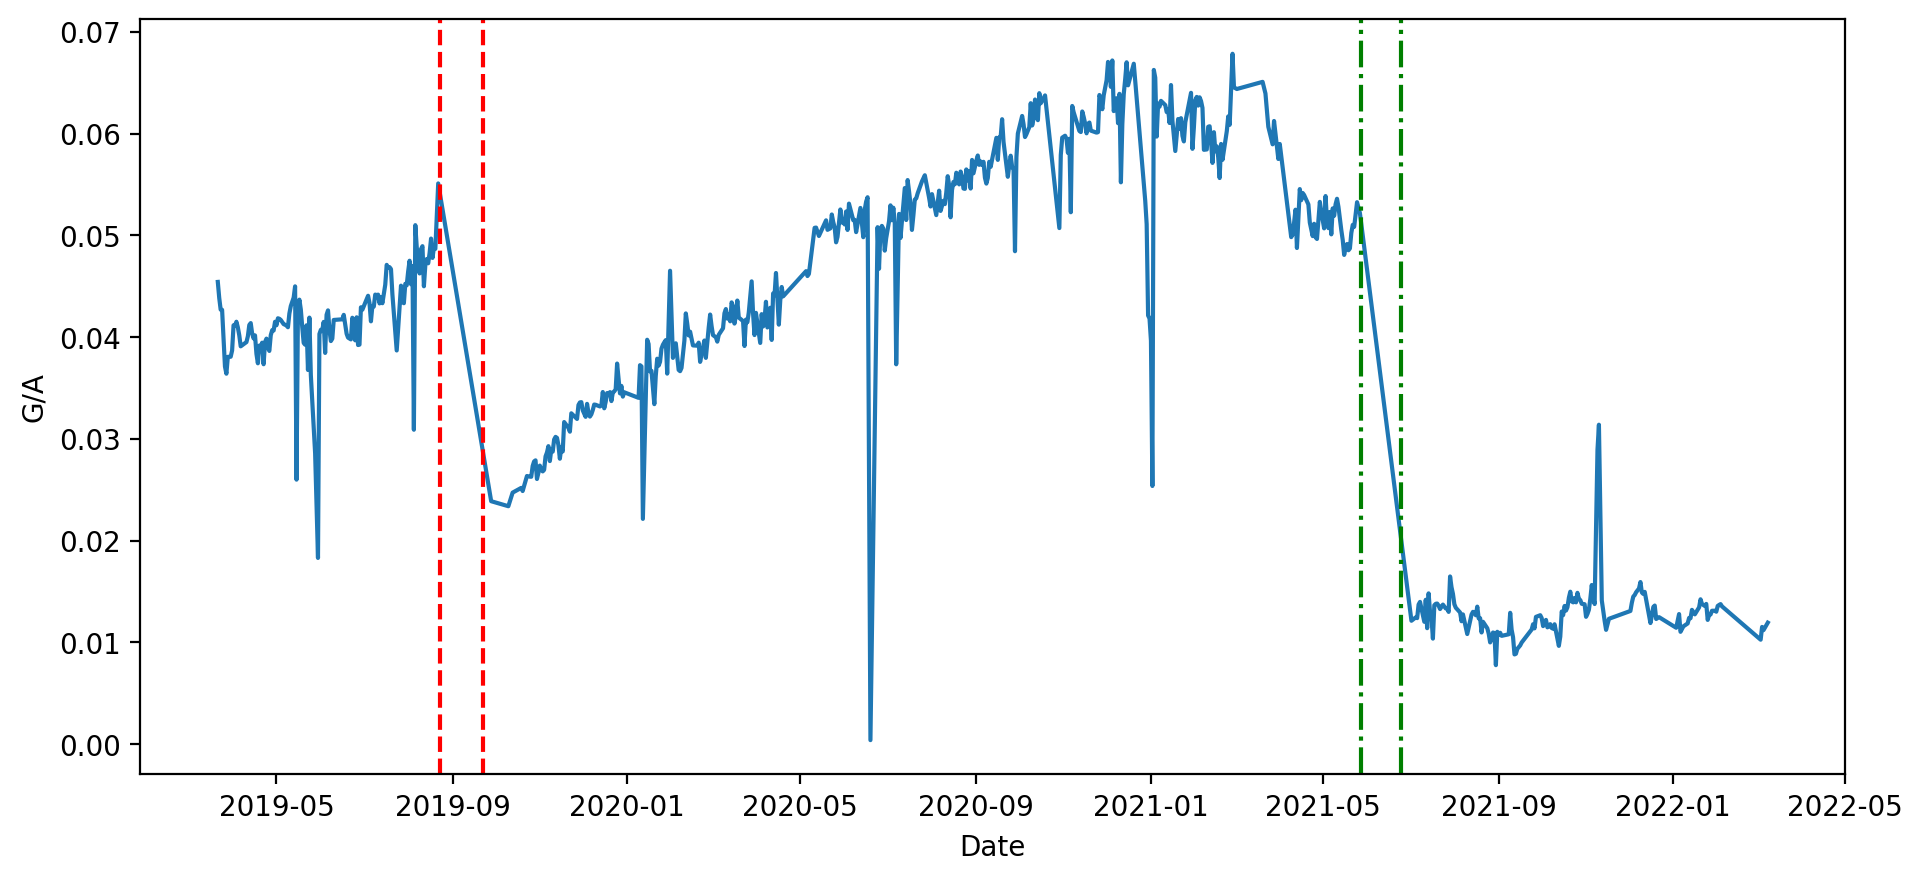

In [18]:
import datetime as dt
fix , ax = plt.subplots(figsize=(11,5),dpi=200)
ax.plot(final_df['date'],final_df['G/A'],)
ax.set_xlabel('Date')
ax.set_ylabel('G/A')
ax.axvline(dt.datetime(2019,8, 23),c='red',ls='--')
ax.axvline(dt.datetime(2019,9, 22),c='red',ls='--')
ax.axvline(dt.datetime(2021,6, 25),c='green',ls='-.')
ax.axvline(dt.datetime(2021,5, 28),c='green',ls='-.')

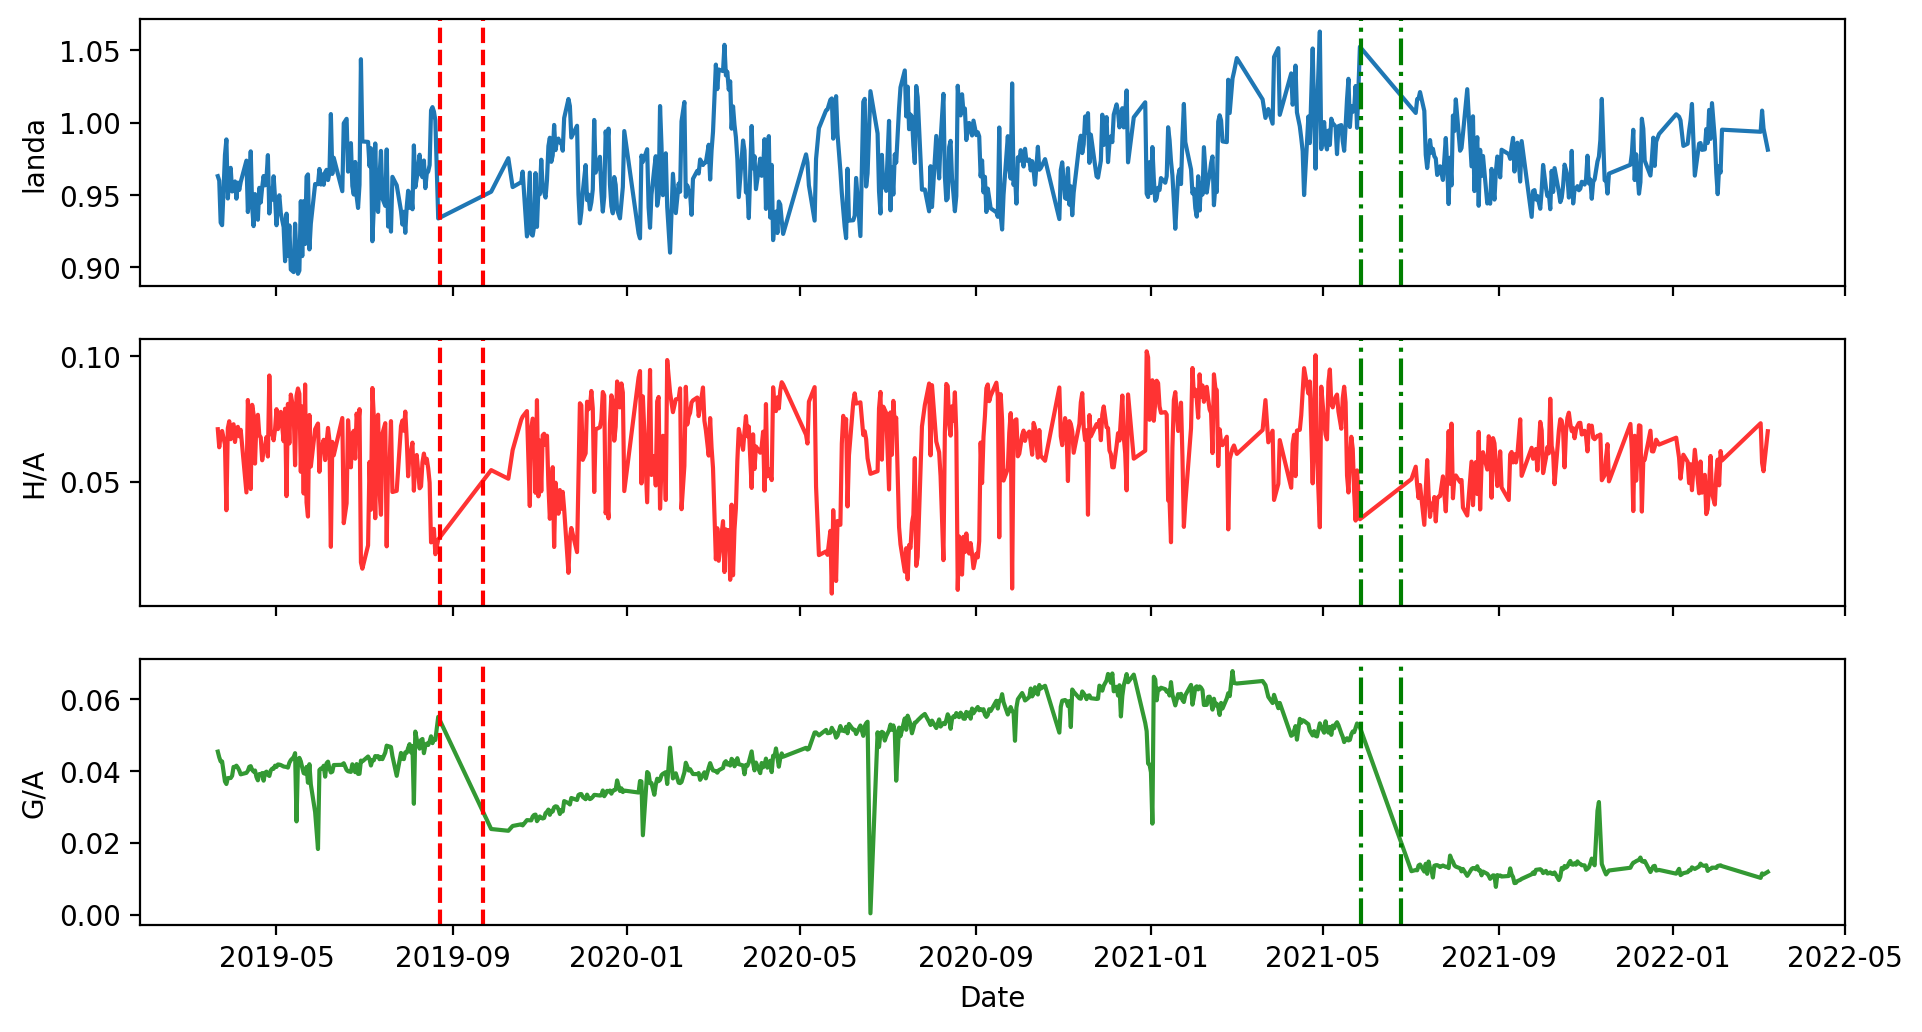

In [62]:
import datetime as dt
fix , ax = plt.subplots(3,1,figsize=(11,6),dpi=200,sharex=True,)
#ax2 = ax.twinx()
ax[0].plot(final_df['date'],final_df['landa'],)
ax[1].plot(final_df['date'],final_df['H/A'],alpha=0.8,c='red')
ax[2].plot(final_df['date'],final_df['G/A'],alpha=0.8,c='green')
ax[2].set_xlabel('Date')
ax[0].set_ylabel('landa')
ax[1].set_ylabel('H/A')
ax[2].set_ylabel('G/A')
for i in range(3):
    ax[i].axvline(dt.datetime(2019,8, 23),c='red',ls='--')
    ax[i].axvline(dt.datetime(2019,9, 22),c='red',ls='--')
    ax[i].axvline(dt.datetime(2021,6, 25),c='green',ls='-.')
    ax[i].axvline(dt.datetime(2021,5, 28),c='green',ls='-.')

In [20]:
x,y=final_df['landa'],final_df['H/A']
m, b = np.polyfit(x, y, 1)

Text(0, 0.5, 'H/A')

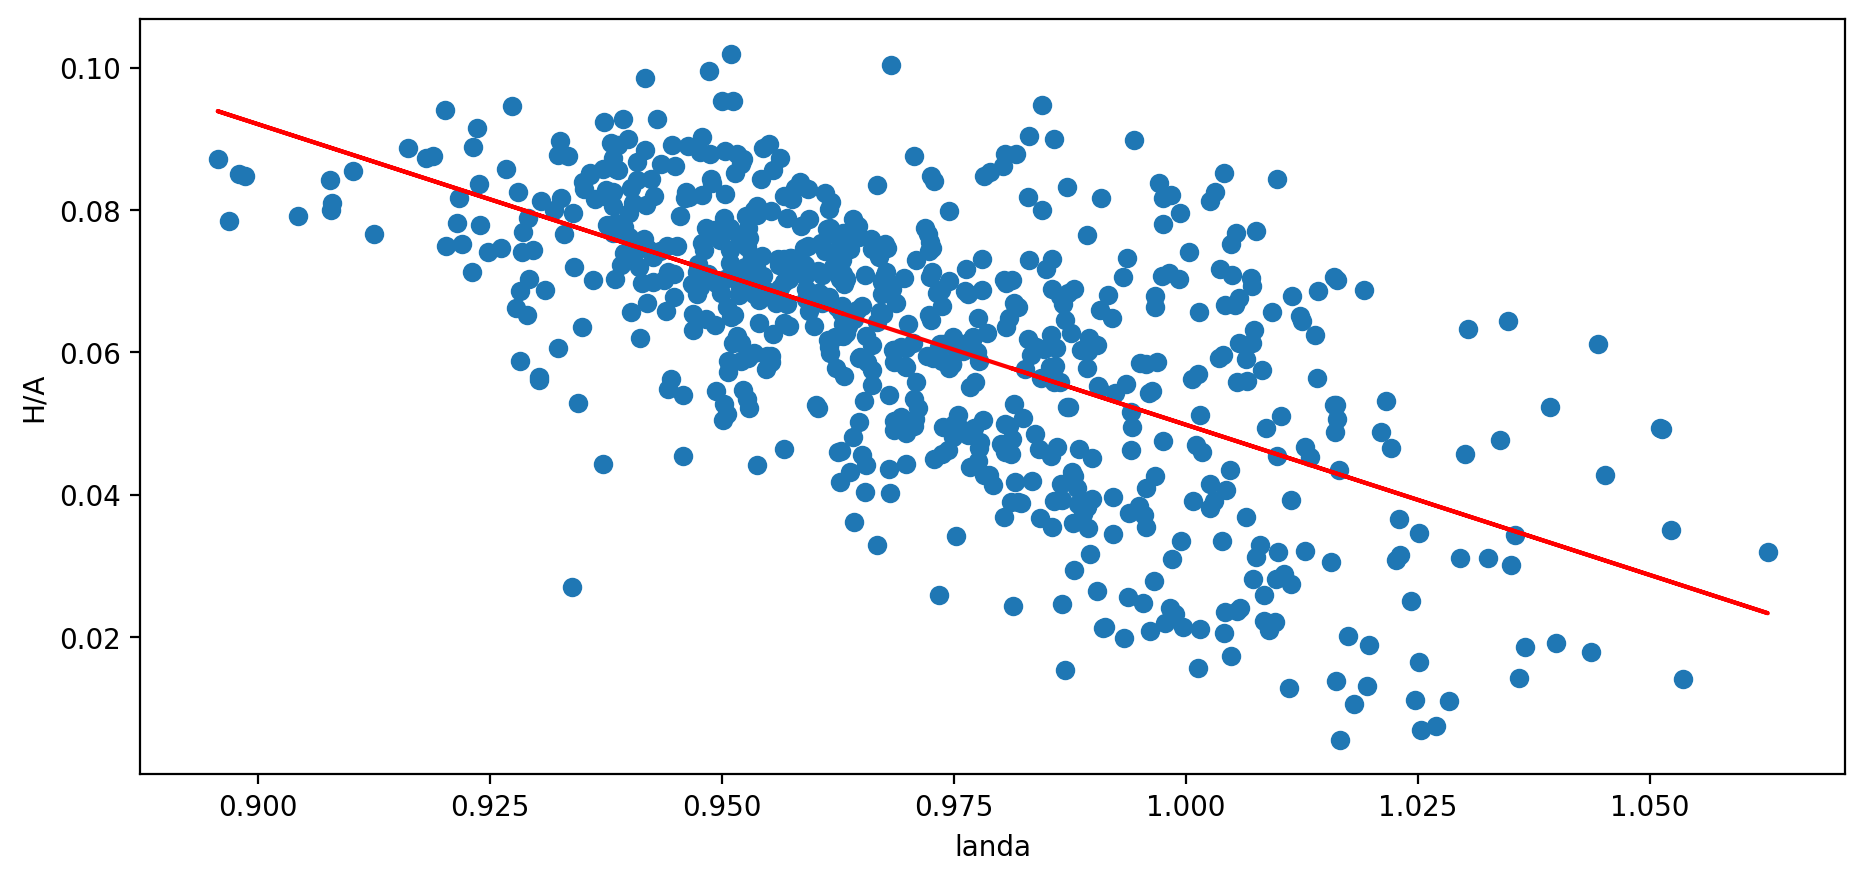

In [21]:
fix , ax = plt.subplots(figsize=(11,5),dpi=200)
ax.scatter(final_df['landa'],final_df['H/A'],)
ax.plot(x,m*x+b , c='red')
ax.set_xlabel('landa')
ax.set_ylabel('H/A')

In [22]:
x,y=final_df['landa'],final_df['G/A']
m, b = np.polyfit(x, y, 1)

Text(0, 0.5, 'G/A')

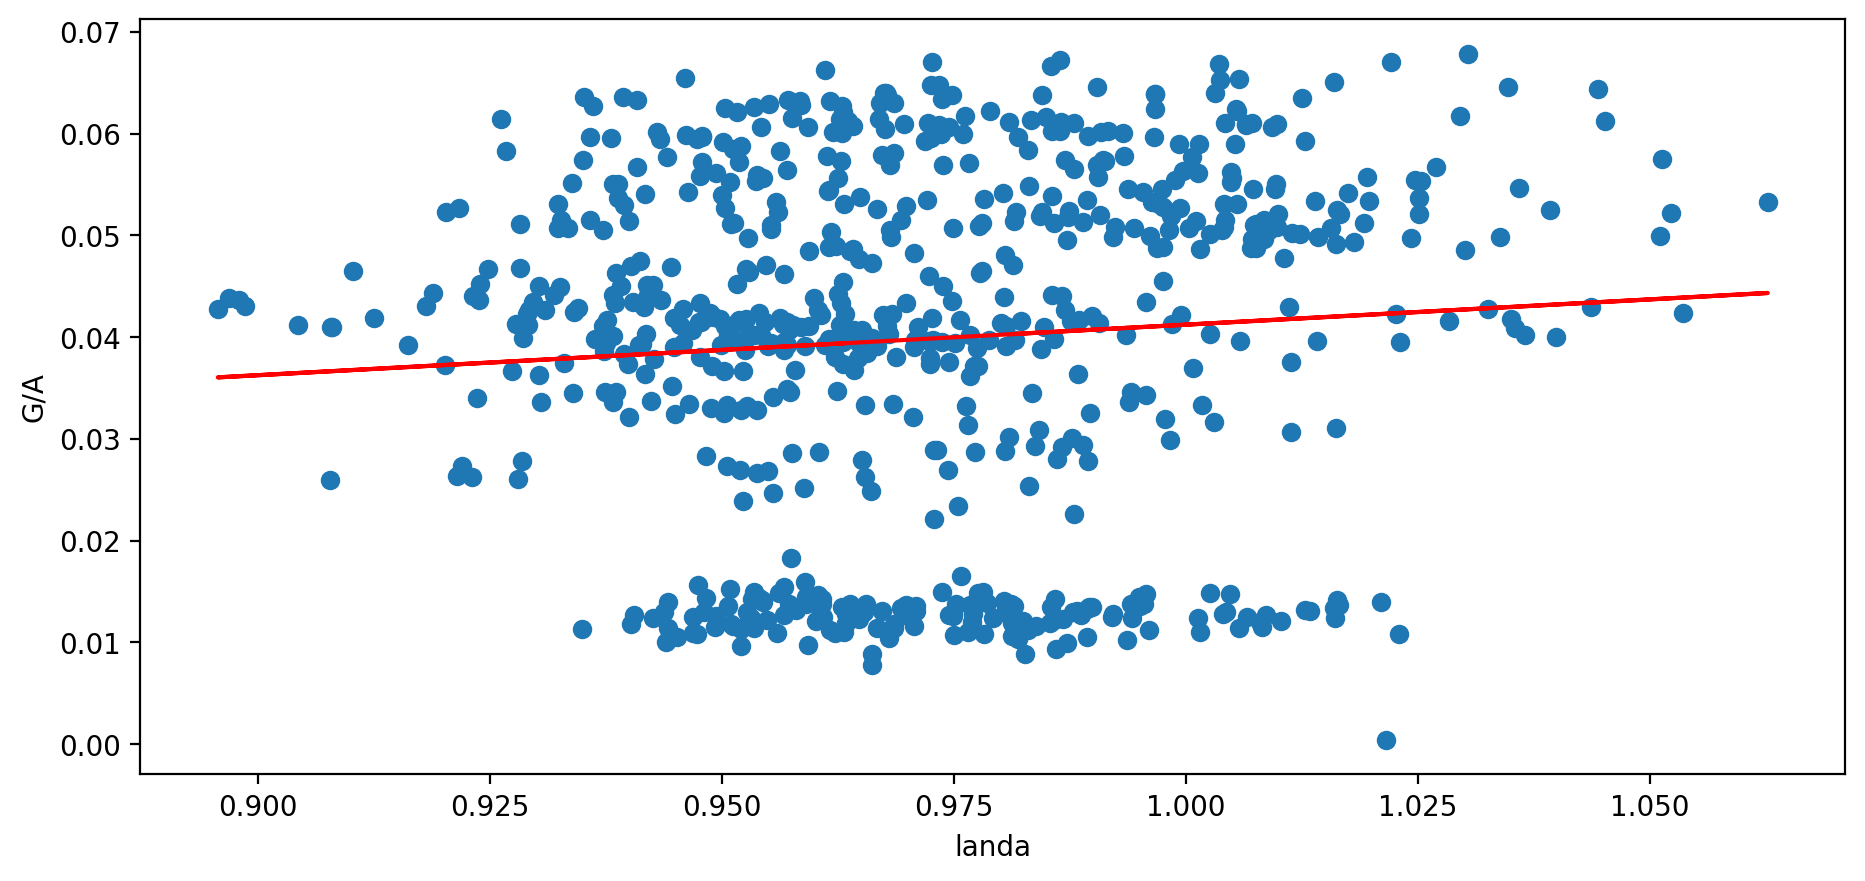

In [23]:
fix , ax = plt.subplots(figsize=(11,5),dpi=200)
ax.scatter(final_df['landa'],final_df['G/A'],)
ax.plot(x,m*x+b , c='red')
ax.set_xlabel('landa')
ax.set_ylabel('G/A')